# Práctica 2 - Laboratorio 3

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import math


In [7]:
#importar dataset
bank = pd.read_csv("bank-dataset.csv", encoding = 'latin_1', sep = ';')
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [8]:
# Eliminamos las columnas menos relevantes dadas por el enunciado
bank=bank.drop(['job','marital','education','housing','loan','contact','poutcome','day_of_week','month','default'],axis=1)

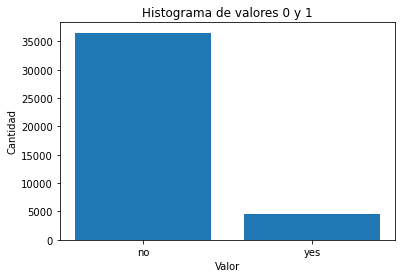

In [9]:
#Revisamos la cantidad de no y si que tiene el dataset
columna_de_interes = bank['y']

# cuenta los valores diferentes en la columna
counts = columna_de_interes.value_counts()

# crea el histograma
plt.bar(counts.index, counts.values)

# añade etiquetas y título
plt.title('Histograma de valores 0 y 1')
plt.xlabel('Valor')
plt.ylabel('Cantidad')

# muestra el histograma
plt.show()

<AxesSubplot:xlabel='y', ylabel='count'>

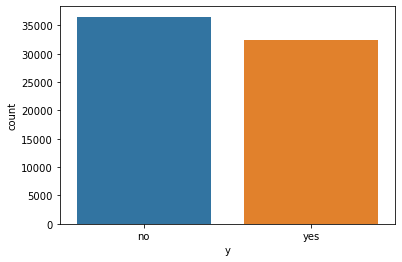

In [10]:
# separa las categorías en dos matrices distintas
categoria_mayoritaria = bank[bank['y'] == 'no']
categoria_minoritaria = bank[bank['y'] == 'yes']

#Calculamos numero de veces que habrá que multiplicar a nuestro conjunto de datos minoritario
repeticiones = len(categoria_mayoritaria) // len(categoria_minoritaria)
concat_categoria_minoritaria = pd.concat([categoria_minoritaria] * repeticiones)

#volvemos a juntar los datos reestructurados
bank = pd.concat([categoria_mayoritaria, concat_categoria_minoritaria])
sns.countplot(data=bank, x='y')

In [11]:
# Comprobamos si hay valores nulos en todas las columnas y mostramos el recuento de valores nulos por columna
null_counts = bank.isna().sum()
print(null_counts[null_counts > 0])

Series([], dtype: int64)


### Categorización y normalización de los datos de entrada


In [12]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
#Transformamos la salida objetivo en 0 y 1
bank['y'] = keras.utils.to_categorical(label_encoder.fit_transform(bank['y']))

#Transformamos las columnas con datos categoricos
categorical_columns = bank.select_dtypes(include=['object']).columns.tolist()
for colum in categorical_columns:
    bank[colum] = label_encoder.fit_transform(bank[colum])

#Normalizacion min-max
BANK = (bank - bank.min()) / (bank.max() - bank.min())

In [13]:
BANK

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,0.053070,0.000000,1.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,1.0
1,0.493827,0.030297,0.000000,1.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,1.0
2,0.246914,0.045954,0.000000,1.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,1.0
3,0.283951,0.030704,0.000000,1.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,1.0
4,0.481481,0.062424,0.000000,1.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,1.0
...,...,...,...,...,...,...,...,...,...,...,...
41174,0.555556,0.042294,0.000000,0.001001,0.857143,0.479167,1.000000,0.00000,0.090002,0.000000,0.0
41178,0.555556,0.098211,0.018182,0.006006,0.428571,0.479167,1.000000,0.00000,0.090002,0.000000,0.0
41181,0.246914,0.057137,0.000000,1.000000,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0.0
41183,0.691358,0.067914,0.000000,1.000000,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0.0


### Definición de dataset de entrenamiento, test y validación

In [9]:
aleatorizar = 1

#Creamos 3 datasets: entrenamiento, validación y test de manera aleatoria
bank_entre_y_valid, bank_test = train_test_split(BANK, test_size = 0.10, shuffle=aleatorizar) # El entreno y validación son el 90% y el conjunto test 10%
bank_entrenamiento, bank_validacion = train_test_split(bank_entre_y_valid, test_size = 0.20, shuffle=aleatorizar) # El entreno es el 80% y el conjunto de validación el 20%

# Salidas de las diferentes listas
X = BANK.pop("y")
salidas_entrenamiento = bank_entrenamiento.pop("y")
salidas_validacion = bank_validacion.pop("y")
salidas_test = bank_test.pop("y")


In [10]:
def validar_neuronas_oculta(M,N):
    limite_inferior = math.ceil(M/(2*N))
    limite_superior = math.floor((2*M)/N)
    # devuelve el rango de valores de n como una tupla
    return (limite_inferior, limite_superior)

In [11]:
def crearRed(neuronasCapaOculta, capasOcultas, tam_entrada):
    K.clear_session()  # limpiar sesión de Keras
        
    print("Creando modelo de red neuronal... %d neuronas capa oculta" % (neuronasCapaOculta))
    model = Sequential()
    model.add(Dense(neuronasCapaOculta, input_dim=tam_entrada, activation='relu'))
    
    # Si se pide crear mas de una capa oculta
    for i in range(1, capasOcultas):
        model.add(Dense(neuronasCapaOculta, activation = 'relu'))
                
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model

In [12]:
def entrenarMLP(model, epoch, entradas, salidas_esperadas):
    callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1)]
    output_fit = model.fit(entradas, salidas_esperadas, epochs=epoch, validation_data=(bank_validacion, salidas_validacion), callbacks=callbacks)
    return output_fit

In [13]:
def evaluarMLP(model, entradas_evaluacion, salidas_esperadas):
    # Evaluar el modelo en el conjunto de validación
    _, accuracy_val = model.evaluate(entradas_evaluacion, salidas_esperadas)
    print('Accuracy en el conjunto de validación: %.2f' % (accuracy_val*100))

    salidas_obtenidas_val = model.predict(entradas_evaluacion)
    salidas_obtenidas_val_binarias = (salidas_obtenidas_val > 0.5).astype(int)
    matriz_confusion_val = confusion_matrix(salidas_esperadas, salidas_obtenidas_val_binarias)
    print('Matriz de confusión en el conjunto de validación:')
    print(matriz_confusion_val)

    reporte_clasificacion = classification_report(salidas_esperadas, salidas_obtenidas_val_binarias, target_names=['no', 'si'])
    print('Reporte de clasificación:')
    print(reporte_clasificacion)
    
    return (accuracy_val*100), matriz_confusion_val, reporte_clasificacion


### Estructura del modelo que da mejores resultado

In [ ]:
neurona = 2500
capa = 2
epoch = 20

In [ ]:
MLP = crearRed(neurona, capa, bank_entrenamiento.shape[1])
output_fit = entrenarMLP(MLP, epoch, bank_entrenamiento, salidas_entrenamiento)
accuracy_val, matriz_confusion_val, reporte_clasificacion = evaluarMLP(MLP, bank_validacion, salidas_validacion)

### Pruebas de Arquitectura

In [15]:
#Obtenemos el rango de neuronas de la capa oculta que cumplen con la regla
rango_neuronas = validar_neuronas_oculta(bank_entrenamiento.shape[0],bank_entrenamiento.shape[1])
print(rango_neuronas[0])
print(rango_neuronas[1])

2485
9940


In [ ]:
#vectores que contendrán los errores y el accuracy
errorF = []
exactF = []

best_accuracy = 0
best_error = 1

accuracy_val_list = []#lista con accuracy

neuronas = [i for i in range(rango_neuronas[0], rango_neuronas[1], 1500)]
capas = [i for i in range(1, 3, 1)]
epochs = [i for i in range(25,100,25)]
precision = 1 

outputErr = [[], []]
for neurona in neuronas:
    for capa in capas:
        for epoch in epochs:
            print("Configuración: %d neuronas en %d capas ocultas con %d iteraciones " % (neurona, capa, epoch))
            err = []
            ex = []
            for i in range(precision):
                MLP = crearRed(neurona, capa, bank_entrenamiento.shape[1])
                output_fit = entrenarMLP(MLP, epoch, bank_entrenamiento, salidas_entrenamiento)
                accuracy_val, matriz_confusion_val, reporte_clasificacion = evaluarMLP(MLP, bank_validacion, salidas_validacion)
                accuracy_val_list.append(accuracy_val)
                err.append(1 - accuracy_val / 100.0)
                ex.append(accuracy_val / 100.0)
                print("Error medio: %.2f, Exactitud media: %.2f" % (np.mean(err), np.mean(ex)))

            error_medio = np.mean(err)
            exactitud_media = np.mean(ex)
            if exactitud_media > best_accuracy:
                best_accuracy = exactitud_media
                best_config = (neurona, capa, epoch)
            if error_medio < best_error:
                best_error = error_medio
                best_config_error = (neurona, capa, epoch)

print("Mejor configuración (precisión): %d neuronas en %d capas ocultas con %d iteraciones" % best_config)
print("Mejor configuración (error): %d neuronas en %d capas ocultas con %d iteraciones" % best_config_error)

Configuración: 2485 neuronas en 1 capas ocultas con 25 iteraciones 
Creando modelo de red neuronal... 2485 neuronas capa oculta
Epoch 1/25
1554/1554 [==============================] - 10s 6ms/step - loss: 0.1139 - accuracy: 0.8428 - val_loss: 0.1093 - val_accuracy: 0.8472
Epoch 2/25
1554/1554 [==============================] - 10s 6ms/step - loss: 0.1018 - accuracy: 0.8632 - val_loss: 0.0977 - val_accuracy: 0.8685
Epoch 3/25
1554/1554 [==============================] - 10s 6ms/step - loss: 0.0983 - accuracy: 0.8689 - val_loss: 0.0953 - val_accuracy: 0.8748
Epoch 4/25
1554/1554 [==============================] - 9s 6ms/step - loss: 0.0959 - accuracy: 0.8710 - val_loss: 0.0936 - val_accuracy: 0.8759
Epoch 5/25
1554/1554 [==============================] - 9s 6ms/step - loss: 0.0948 - accuracy: 0.8732 - val_loss: 0.0955 - val_accuracy: 0.8753
Epoch 6/25
1554/1554 [==============================] - 10s 6ms/step - loss: 0.0935 - accuracy: 0.8736 - val_loss: 0.0937 - val_accuracy: 0.8728
Epoc

1554/1554 [==============================] - 18s 12ms/step - loss: 0.1076 - accuracy: 0.8528 - val_loss: 0.0972 - val_accuracy: 0.8695
Epoch 2/25
1554/1554 [==============================] - 18s 12ms/step - loss: 0.0976 - accuracy: 0.8669 - val_loss: 0.0948 - val_accuracy: 0.8715
Epoch 3/25
1554/1554 [==============================] - 18s 12ms/step - loss: 0.0957 - accuracy: 0.8707 - val_loss: 0.0947 - val_accuracy: 0.8712
Epoch 4/25
1554/1554 [==============================] - 18s 11ms/step - loss: 0.0942 - accuracy: 0.8728 - val_loss: 0.0895 - val_accuracy: 0.8798
Epoch 5/25
1554/1554 [==============================] - 17s 11ms/step - loss: 0.0924 - accuracy: 0.8749 - val_loss: 0.0896 - val_accuracy: 0.8802
Epoch 6/25
1554/1554 [==============================] - 18s 11ms/step - loss: 0.0911 - accuracy: 0.8769 - val_loss: 0.0882 - val_accuracy: 0.8807
Epoch 7/25
1554/1554 [==============================] - 18s 12ms/step - loss: 0.0900 - accuracy: 0.8786 - val_loss: 0.0872 - val_accura

Epoch 27/50
1554/1554 [==============================] - 18s 12ms/step - loss: 0.0836 - accuracy: 0.8882 - val_loss: 0.0859 - val_accuracy: 0.8851
Epoch 28/50
1554/1554 [==============================] - 20s 13ms/step - loss: 0.0833 - accuracy: 0.8887 - val_loss: 0.0832 - val_accuracy: 0.8900
Epoch 29/50
1554/1554 [==============================] - 19s 12ms/step - loss: 0.0830 - accuracy: 0.8885 - val_loss: 0.0846 - val_accuracy: 0.8876
Epoch 30/50
1554/1554 [==============================] - 18s 12ms/step - loss: 0.0825 - accuracy: 0.8899 - val_loss: 0.0831 - val_accuracy: 0.8898
Epoch 31/50
1554/1554 [==============================] - 19s 12ms/step - loss: 0.0824 - accuracy: 0.8895 - val_loss: 0.0827 - val_accuracy: 0.8892
Epoch 32/50
1554/1554 [==============================] - 19s 12ms/step - loss: 0.0822 - accuracy: 0.8896 - val_loss: 0.0861 - val_accuracy: 0.8828
Epoch 33/50
1554/1554 [==============================] - 18s 12ms/step - loss: 0.0821 - accuracy: 0.8894 - val_loss: 0

1554/1554 [==============================] - 10s 6ms/step - loss: 0.0857 - accuracy: 0.8860 - val_loss: 0.0849 - val_accuracy: 0.8856
Epoch 34/50
1554/1554 [==============================] - 10s 7ms/step - loss: 0.0855 - accuracy: 0.8863 - val_loss: 0.0856 - val_accuracy: 0.8861
Epoch 00034: early stopping
389/389 [==============================] - 1s 4ms/step - loss: 0.0856 - accuracy: 0.8861
Accuracy en el conjunto de validación: 88.61
Matriz de confusión en el conjunto de validación:
[[5493  311]
 [1104 5517]]
Reporte de clasificación:
              precision    recall  f1-score   support

          no       0.83      0.95      0.89      5804
          si       0.95      0.83      0.89      6621

    accuracy                           0.89     12425
   macro avg       0.89      0.89      0.89     12425
weighted avg       0.89      0.89      0.89     12425

Error medio: 0.11, Exactitud media: 0.89
Configuración: 3985 neuronas en 1 capas ocultas con 75 iteraciones 
Creando modelo de r

Accuracy en el conjunto de validación: 88.65
Matriz de confusión en el conjunto de validación:
[[5523  281]
 [1129 5492]]
Reporte de clasificación:
              precision    recall  f1-score   support

          no       0.83      0.95      0.89      5804
          si       0.95      0.83      0.89      6621

    accuracy                           0.89     12425
   macro avg       0.89      0.89      0.89     12425
weighted avg       0.89      0.89      0.89     12425

Error medio: 0.11, Exactitud media: 0.89
Configuración: 3985 neuronas en 2 capas ocultas con 50 iteraciones 
Creando modelo de red neuronal... 3985 neuronas capa oculta
Epoch 1/50
1554/1554 [==============================] - 28s 18ms/step - loss: 0.1085 - accuracy: 0.8522 - val_loss: 0.0981 - val_accuracy: 0.8689
Epoch 2/50
1554/1554 [==============================] - 26s 17ms/step - loss: 0.0990 - accuracy: 0.8652 - val_loss: 0.0954 - val_accuracy: 0.8706
Epoch 3/50
1554/1554 [==============================] - 27s 17ms

1554/1554 [==============================] - 11s 7ms/step - loss: 0.1016 - accuracy: 0.8629 - val_loss: 0.1071 - val_accuracy: 0.8611
Epoch 3/75
1554/1554 [==============================] - 10s 7ms/step - loss: 0.0980 - accuracy: 0.8676 - val_loss: 0.0959 - val_accuracy: 0.8757
Epoch 4/75
1554/1554 [==============================] - 11s 7ms/step - loss: 0.0953 - accuracy: 0.8724 - val_loss: 0.0937 - val_accuracy: 0.8763
Epoch 5/75
1554/1554 [==============================] - 10s 7ms/step - loss: 0.0944 - accuracy: 0.8721 - val_loss: 0.0948 - val_accuracy: 0.8754
Epoch 6/75
1554/1554 [==============================] - 11s 7ms/step - loss: 0.0936 - accuracy: 0.8740 - val_loss: 0.0918 - val_accuracy: 0.8800
Epoch 7/75
1554/1554 [==============================] - 11s 7ms/step - loss: 0.0931 - accuracy: 0.8755 - val_loss: 0.0944 - val_accuracy: 0.8762
Epoch 8/75
1554/1554 [==============================] - 10s 7ms/step - loss: 0.0923 - accuracy: 0.8758 - val_loss: 0.0910 - val_accuracy: 0.8

Epoch 20/25
1554/1554 [==============================] - 43s 28ms/step - loss: 0.0850 - accuracy: 0.8855 - val_loss: 0.0844 - val_accuracy: 0.8872
Epoch 21/25
1554/1554 [==============================] - 50s 32ms/step - loss: 0.0851 - accuracy: 0.8861 - val_loss: 0.0843 - val_accuracy: 0.8865
Epoch 22/25
1554/1554 [==============================] - 48s 31ms/step - loss: 0.0845 - accuracy: 0.8863 - val_loss: 0.0853 - val_accuracy: 0.8864
Epoch 23/25
1554/1554 [==============================] - 44s 28ms/step - loss: 0.0843 - accuracy: 0.8867 - val_loss: 0.0842 - val_accuracy: 0.8875
Epoch 24/25
1554/1554 [==============================] - 46s 30ms/step - loss: 0.0842 - accuracy: 0.8869 - val_loss: 0.0839 - val_accuracy: 0.8859
Epoch 25/25
389/389 [==============================] - 2s 6ms/step - loss: 0.0833 - accuracy: 0.8882
Accuracy en el conjunto de validación: 88.82
Matriz de confusión en el conjunto de validación:
[[5392  412]
 [ 977 5644]]
Reporte de clasificación:
              pr

1554/1554 [==============================] - 12s 8ms/step - loss: 0.0875 - accuracy: 0.8826 - val_loss: 0.0863 - val_accuracy: 0.8848
Epoch 23/50
1554/1554 [==============================] - 12s 8ms/step - loss: 0.0874 - accuracy: 0.8823 - val_loss: 0.0862 - val_accuracy: 0.8850
Epoch 24/50
1554/1554 [==============================] - 12s 8ms/step - loss: 0.0871 - accuracy: 0.8832 - val_loss: 0.0861 - val_accuracy: 0.8839
Epoch 25/50
1554/1554 [==============================] - 11s 7ms/step - loss: 0.0869 - accuracy: 0.8834 - val_loss: 0.0857 - val_accuracy: 0.8868
Epoch 26/50
1554/1554 [==============================] - 12s 7ms/step - loss: 0.0867 - accuracy: 0.8830 - val_loss: 0.0862 - val_accuracy: 0.8835
Epoch 27/50
1554/1554 [==============================] - 12s 8ms/step - loss: 0.0866 - accuracy: 0.8836 - val_loss: 0.0861 - val_accuracy: 0.8856
Epoch 28/50
1554/1554 [==============================] - 13s 8ms/step - loss: 0.0865 - accuracy: 0.8838 - val_loss: 0.0848 - val_accurac

### Número de aciertos para el dataset de prueba y matriz de confución. Conclusiones de la matriz

In [ ]:
#Comprobamos la exactitud del modelo para los datos de validación
accuracy_val, matriz_confusion_val, reporte_clasificacion = evaluarMLP(MLP, bank_validacion, salidas_validacion)

In [ ]:
#Comprobamos la exactitud del modelo para los datos de test
accuracy_val, matriz_confusion_val, reporte_clasificacion = evaluarMLP(MLP, bank_test, salidas_test)

### Variables que influyen más/menos a la hora de contratar un depósito. Explicar método

#### Correlacion de columnas

In [14]:
corr_matrix = BANK.corr()
corr_matrix

# Seleccionar la fila correspondiente a la variable objetivo
target_corr = corr_matrix.iloc[-1, :-1]

# Ordenar las correlaciones de mayor a menor
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

# Imprimir las correlaciones ordenadas
print(target_corr_sorted)

nr.employed       0.468638
duration          0.467445
euribor3m         0.446663
emp.var.rate      0.430636
pdays             0.313609
previous          0.262540
cons.price.idx    0.197715
campaign          0.120888
cons.conf.idx     0.075635
age               0.041939
Name: y, dtype: float64


<AxesSubplot:>

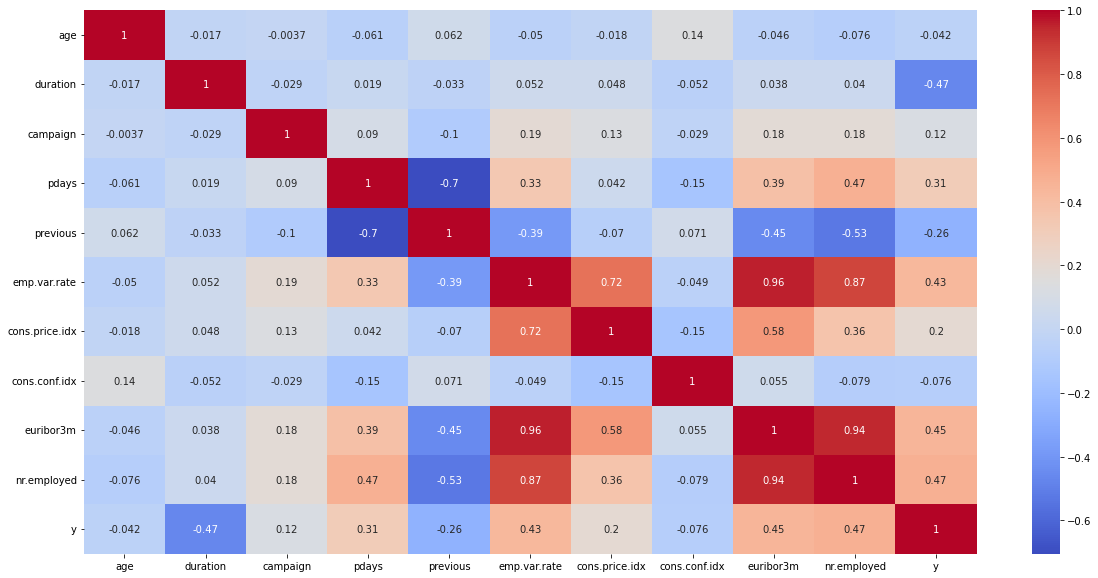

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#Los valores mas altos de correlacion aparecen en rojo y los bajos en azul.
#"annot=True" muestra los valores de correlación en cada celda de la matriz. 
#"cmap='coolwarm'" establece la paleta de colores que se utilizará en la visualización.